
# BUS 659 — Class 2 Problem Set: Data Manipulation & Plotting

**Dataset:** `../datasets/movies_dataset.csv`  
**Goal:** Practice core Python skills discussed in class & slides — loading data, inspecting structure, filtering, grouping, creating new variables, and making plots (scatter, smoothing lines, histograms, bars).  
**Instructions:** Work directly in this notebook. For each question, write your code in the cell provided under the prompt. Add additional cells as needed.


In [1]:
# Please enter your name in a comment here, or maybe in a creative print statement
# Lewis

In [2]:
# %%
# Warm-up: imports and display options
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)



### 1) Load the dataset
Load `../datasets/movies_dataset.csv` into a DataFrame named `movies`. Show the shape.


In [3]:
movies = pd.read_csv('../datasets/movies_dataset.csv')


### 2) Quick preview and columns
Show the first 7 rows and list all column names.


In [4]:
print(movies.head(7))


             movie_title         original_title    director_name    actor_1_name          actor_2_name  \
0                Animale                Animale    Emma Benestan   Oulaya Amamra       Damien Rebattel   
1   Deadpool & Wolverine   Deadpool & Wolverine       Shawn Levy   Ryan Reynolds          Hugh Jackman   
2   Sonic the Hedgehog 3   Sonic the Hedgehog 3      Jeff Fowler      Jim Carrey          Ben Schwartz   
3         The Wild Robot         The Wild Robot    Chris Sanders  Lupita Nyong'o          Pedro Pascal   
4  Mufasa: The Lion King  Mufasa: The Lion King    Barry Jenkins    Aaron Pierre  Kelvin Harrison, Jr.   
5           Inside Out 2           Inside Out 2      Kelsey Mann     Amy Poehler            Maya Hawke   
6          The Substance          The Substance  Coralie Fargeat      Demi Moore      Margaret Qualley   

         actor_3_name     budget       gross  title_year release_date  duration  vote_average  vote_count  popularity  \
0    Vivien Rodriguez    38000


### 3) Types & missing values
Display `movies.info()` and compute missing-value counts per column (sorted descending).


In [5]:
# note for missing values use: movies.isna().sum().sort_values(ascending=False)
movies.info()
movies.isna().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        3000 non-null   object 
 1   original_title     3000 non-null   object 
 2   director_name      2901 non-null   object 
 3   actor_1_name       2902 non-null   object 
 4   actor_2_name       2772 non-null   object 
 5   actor_3_name       2614 non-null   object 
 6   budget             3000 non-null   int64  
 7   gross              3000 non-null   int64  
 8   title_year         3000 non-null   int64  
 9   release_date       3000 non-null   object 
 10  duration           3000 non-null   int64  
 11  vote_average       3000 non-null   float64
 12  vote_count         3000 non-null   int64  
 13  popularity         3000 non-null   float64
 14  genres             2885 non-null   object 
 15  country            2580 non-null   object 
 16  original_language  3000 

tagline              1020
imdb_id               672
country               420
actor_3_name          386
actor_2_name          228
overview              202
genres                115
director_name          99
actor_1_name           98
popularity              0
tmdb_id                 0
original_language       0
movie_title             0
vote_count              0
vote_average            0
original_title          0
release_date            0
title_year              0
gross                   0
budget                  0
duration                0
dtype: int64


### 4) Filtering
Create a filtered DataFrame of films released **after 2005** with **budget ≥ $20M**. Show the first 10 rows with the columns: `movie_title`, `title_year`, `budget`, and `gross`.


In [6]:
Movies_post_2005 = movies[['movie_title','title_year','budget','gross']]
print(Movies_post_2005.head(11))

              movie_title  title_year     budget       gross
0                 Animale        2024    3800000       71924
1    Deadpool & Wolverine        2024  200000000  1338073645
2    Sonic the Hedgehog 3        2024  122000000   492162604
3          The Wild Robot        2024   78000000   331982078
4   Mufasa: The Lion King        2024  200000000   722631756
5            Inside Out 2        2024  200000000  1698863816
6           The Substance        2024   17500000    76506196
7                   Anora        2024    6000000    56286295
8          Dune: Part Two        2024  190000000   714444358
9       Kraven the Hunter        2024  130000000    62076533
10  Bad Boys: Ride or Die        2024  100000000   404547819



### 5) Sorting & selecting
Show the **top 15** films by **rating (`vote_average`)**, selecting columns `movie_title`, `vote_average`, `title_year`, `director_name`.


In [7]:
Movies_by_vote_Avg = (movies.sort_values('vote_average', ascending=False)
[['vote_average','movie_title', 'title_year', 'director_name']])

print(Movies_by_vote_Avg.head(16))

      vote_average                  movie_title  title_year          director_name
575           10.0                      JACKPOT        2023          Hjalte Larsen
936           10.0                        Alive        2022          Stacie Hansen
680           10.0  The Debacle of Mr. Eastward        2023             Boden Ford
1419          10.0         It Ends With A Knife        2020      Kevin Lucero Less
934           10.0           Dinner as a couple        2022      Jonathan Landeros
1417          10.0              Milestone No. 2        2020      Nicholas Dapolito
208           10.0               DIES MIRABILIS        2024       Louis  Vernocchi
207           10.0                  El Redentor        2024        Andrew Bañuelos
1409          10.0                 Article 21 A        2020             Mahi Dubey
217           10.0                 Rekillection        2024          Cameron Cooke
2651          10.0           Oye Kuch Kar Guzar        2016         Harris Rasheed
2662


### 6) Create new variables
Create the following variables:
- `profit = gross - budget`  
- `roi = gross / budget` (handle division by zero safely)  
- `log_budget` and `log_gross` as base-10 logs (handle zeros/nans).  
Display the first 8 rows of these new columns.


In [8]:
movies['profit'] = movies['gross'] - movies['budget']
safe_budget = movies['budget'].replace({0: np.nan})
movies['log_gross']  = np.log10(movies['gross'].replace({0: np.nan}))
movies['log_budget']  = np.log10(movies['budget'].replace({0: np.nan}))

movies['roi'] = movies['gross'] / safe_budget

movies['roi_log'] = np.log10(movies['roi'])


movie_calculations = movies[['movie_title','profit','gross','roi','log_gross','log_budget','roi_log']]

print(movie_calculations.head(9))


# Note to handle division by zero safely use: 
# safe_budget = movies['budget'].replace({0: np.nan})
# movies['log_gross']  = np.log10(movies['gross'].replace({0: np.nan}))

# Why? .replace({0: np.nan}) tells pandas to replace all 0 values with NaN (np.nan = “Not a Number”, a missing value placeholder).


             movie_title      profit       gross       roi  log_gross  log_budget   roi_log
0                Animale    -3728076       71924  0.018927   4.856874    6.579784 -1.722910
1   Deadpool & Wolverine  1138073645  1338073645  6.690368   9.126480    8.301030  0.825450
2   Sonic the Hedgehog 3   370162604   492162604  4.034120   8.692109    8.086360  0.605749
3         The Wild Robot   253982078   331982078  4.256180   8.521115    7.892095  0.629020
4  Mufasa: The Lion King   522631756   722631756  3.613159   8.858917    8.301030  0.557887
5           Inside Out 2  1498863816  1698863816  8.494319   9.230159    8.301030  0.929129
6          The Substance    59006196    76506196  4.371783   7.883697    7.243038  0.640659
7                  Anora    50286295    56286295  9.381049   7.750403    6.778151  0.972251
8         Dune: Part Two   524444358   714444358  3.760233   8.853968    8.278754  0.575215



### 7) Categoricals & flags
Create:
- `budget_category` with bins: (0, 1e6], (1e6, 50e6], (50e6, 100e6], (100e6, inf] labeled `Low`, `Medium`, `High`, `Blockbuster`  
- `is_profitable` as a boolean (`profit` > 0)  
Show a cross-tab of `budget_category` by `is_profitable`.


In [9]:

# budget_category = pd.cut(movies['budget'], bins=[0, 1e6, 50e6, 100e6, np.inf], labels=['Low','Medium','High','Blockbuster'])

movies['budget_category'] = pd.cut(
    movies['budget'],
    bins=[0, 1e6, 50e6, 100e6, np.inf],
    labels=['Low','Medium','High','Blockbuster']
)

movies['is_profitable'] = movies['profit'] > 0

cross_tab = pd.crosstab(movies['budget_category'], movies['is_profitable'])
print(cross_tab.head())


is_profitable    False  True 
budget_category              
Low                607    664
Medium             667    758
High                40    102
Blockbuster         24    138



### 8) GroupBy
Compute the **mean gross** and **median profit** by `title_year`. Return a tidy DataFrame sorted by `title_year` descending. Show the first 12 rows.


In [10]:
movies.groupby('title_year')['profit'].agg(['mean','median']).sort_values(by='title_year', ascending=False).head(12)




,mean,median
title_year,,
2024,2.504421e+07,90.0
2023,2.649557e+07,40.0
2022,2.992380e+07,0.0
2021,2.015835e+07,0.0
2020,9.000978e+06,0.0
2019,5.438809e+07,875.0
2018,4.818358e+07,90000.0
2017,4.764727e+07,758483.0
2016,4.903452e+07,1007699.0



### 9) Top-N within groups
For each `title_year`, return the **top 2 films by gross** (show `title_year`, `movie_title`, `gross`). Combine results for all years into one DataFrame.


In [11]:
top2_year = movies[['title_year', 'movie_title','gross']].sort_values(['title_year', 'gross'], ascending=[True, False])
top2_year.groupby('title_year').head(2)



,title_year,movie_title,gross
2732,2015,Star Wars: The Force Awakens,2068223624
2720,2015,Jurassic World,1671537444
2390,2016,Captain America: Civil War,1155046416
2404,2016,Rogue One: A Star Wars Story,1056057273
2082,2017,Star Wars: The Last Jedi,1332698830
2086,2017,The Fate of the Furious,1236000000
1754,2018,Avengers: Infinity War,2052415039
1762,2018,Black Panther,1349926083
1496,2019,Avengers: Endgame,2799439100
1499,2019,Frozen II,1453683476



### 10) Top categories
Show the **top 12 countries** by number of films. Then filter `movies` to only those countries for the next questions.


In [12]:
#Cleaning Data so I can compare and contrast our results when we us the first country compared to the second
movies[['country_1','country_2']] = movies['country'].str.split('|', n = 1, expand = True)

#Filling null values caused by splitting string
movies['country_2'] = movies['country_2'].fillna(movies['country_1'])


top_countries_1 = movies['country_1'].value_counts().head(12).reset_index()
print(top_countries_1)

top_countries_2 = movies['country_2'].value_counts().head(12).reset_index()
print(top_countries_2)



                   country_1  count
0   United States of America    817
1                      India    255
2             United Kingdom    155
3                     France    136
4                     Canada    126
5                      China     80
6                     Brazil     72
7                    Belgium     67
8                  Australia     66
9                      Italy     58
10                    Russia     56
11                     Spain     48
                   country_2  count
0   United States of America   1019
1                      India    243
2                     France    149
3             United Kingdom    138
4                     Brazil     62
5                     Russia     62
6                      Spain     59
7                    Germany     53
8                     Canada     53
9                      Italy     50
10                      Iran     47
11                     China     44



### 11) Scatter with smoothing (plotnine)
Using **plotnine**, make a scatter of `budget` vs `gross` colored by `vote_average`, then add a smoothing line (`geom_smooth`). Add appropriate labels.  
*(Tip: If a figure doesn't render, try `print(plot_object)`.)*


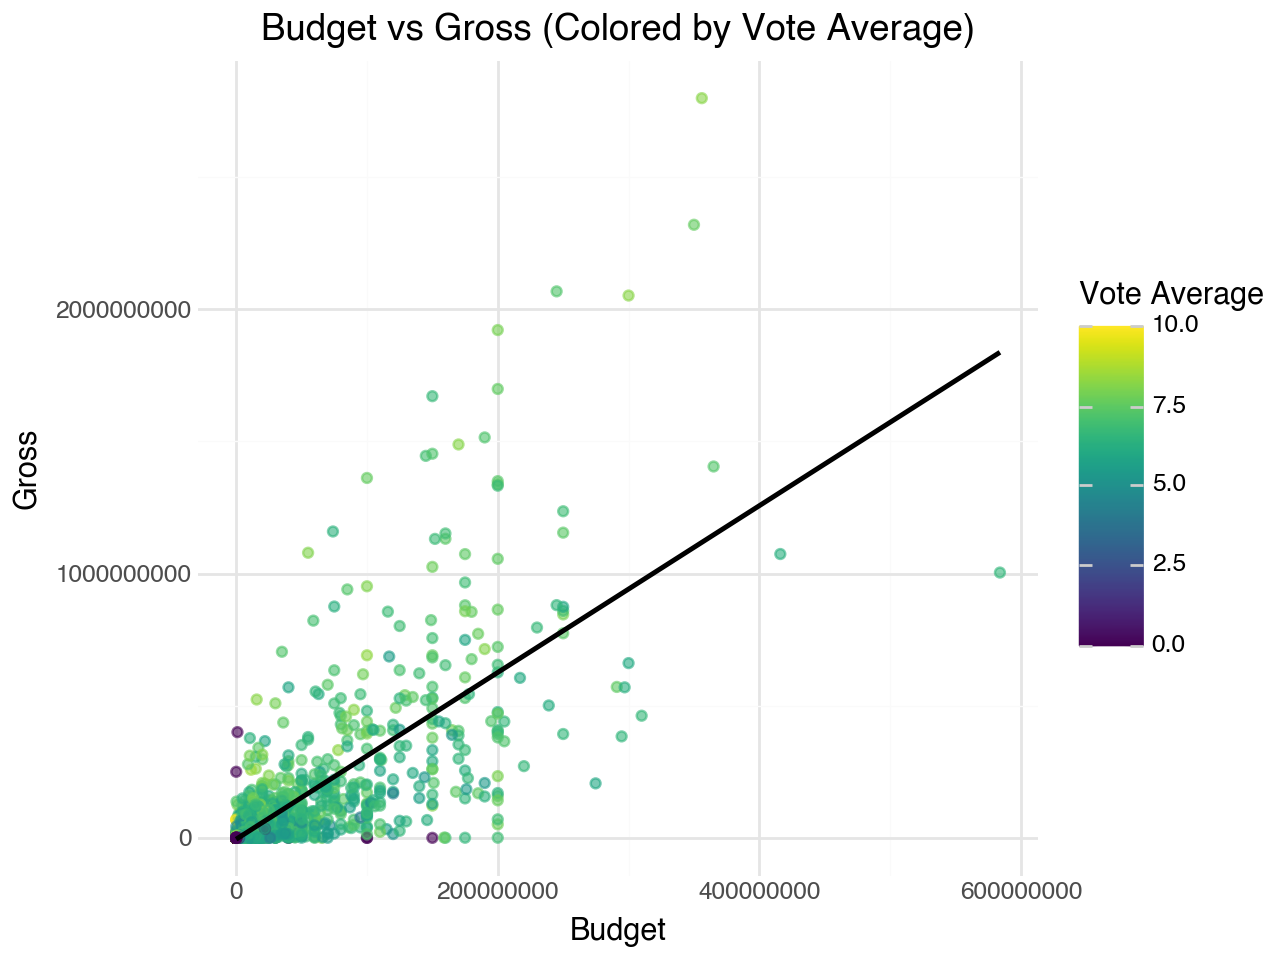

In [14]:
# import plotnine as p9
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_minimal

# Scatter with smoothing
plot_object = (
    ggplot(movies, aes(x='budget', y='gross', color='vote_average')) +
    geom_point(alpha=0.6) +                           # scatterplot points
    geom_smooth(se=False, color='black') +  # smoothing line
    theme_minimal() +
    labs(
        title='Budget vs Gross (Colored by Vote Average)',
        x='Budget',
        y='Gross',
        color='Vote Average'
    )
)

# Print to render
plot_object.show()



### 12) Histogram of a new variable (plotnine)
Make a histogram of **`roi`** with 40 bins. Add a vertical line at the median `roi`. *(Hint: `geom_vline`)*



### 13) Faceted scatter (plotnine)
Create a faceted scatter of `log_budget` vs `log_gross` by `budget_category`. Add a smoothing line without a confidence band.



### 14) One interactive plot (plotly)
Using **plotly**, create an interactive scatter of `vote_average` vs `gross` with hover data (`movie_title`, `director_name`, `title_year`). Use a browser renderer.
